# **Tematyka**


*   `Rozpoznawanie części mowy (POS Tagginng)`
*   `Bag of words`
*   `Częstotliwość słów`
*   `Synomimy i Antonimy`




In [2]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> q

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
nltk.download("book")

***`POS tagging`*** to proces identyfikacji części mowy w zdaniu. Poniższy przykład przybliży nas do problemu.

In [7]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import pos_tag
text = """Monty Python (also collectively known as the Pythons) were a British surreal comedy troupe who created the sketch comedy television show Monty Python's Flying Circus, which first aired on the BBC in 1969. Forty-five episodes were made over four series.()"""
words= [word_tokenize(i) for i in sent_tokenize(text)]
pos_tag= [nltk.pos_tag(i,tagset="universal") for i in words]
print(pos_tag)
# Each tuple contains the single word with the part of speech: nouns, pronouns, adjectives etc.

[[('Monty', 'NOUN'), ('Python', 'NOUN'), ('(', '.'), ('also', 'ADV'), ('collectively', 'ADV'), ('known', 'VERB'), ('as', 'ADP'), ('the', 'DET'), ('Pythons', 'NOUN'), (')', '.'), ('were', 'VERB'), ('a', 'DET'), ('British', 'ADJ'), ('surreal', 'NOUN'), ('comedy', 'NOUN'), ('troupe', 'NOUN'), ('who', 'PRON'), ('created', 'VERB'), ('the', 'DET'), ('sketch', 'NOUN'), ('comedy', 'NOUN'), ('television', 'NOUN'), ('show', 'NOUN'), ('Monty', 'NOUN'), ('Python', 'NOUN'), ("'s", 'PRT'), ('Flying', 'NOUN'), ('Circus', 'NOUN'), (',', '.'), ('which', 'DET'), ('first', 'ADV'), ('aired', 'VERB'), ('on', 'ADP'), ('the', 'DET'), ('BBC', 'NOUN'), ('in', 'ADP'), ('1969', 'NUM'), ('.', '.')], [('Forty-five', 'ADJ'), ('episodes', 'NOUN'), ('were', 'VERB'), ('made', 'VERB'), ('over', 'ADP'), ('four', 'NUM'), ('series', 'NOUN'), ('.', '.')], [('(', '.'), (')', '.')]]


***`Bag-of-Words`***

Uproszczona technika reprezentacji tekstu, która zwraca liczbę wystąpień słów. Przeliczalne zbiory są tworzone w celu zbadania podobieństwa tekstów. Gramatyka i kontekst są ignorowane. 

In [14]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
texts = [
    "John has a new bike",
    "John from Washington has a beautiful bike,"
    "Anna has a new car",
    "John's bike is new"
]

In [15]:
# Podział tekstu na tokeny
tokens = [tokenizer.tokenize(text) for text in texts]
tokens

[['John', 'has', 'a', 'new', 'bike'],
 ['John',
  'from',
  'Washington',
  'has',
  'a',
  'beautiful',
  'bike',
  ',',
  'Anna',
  'has',
  'a',
  'new',
  'car'],
 ['John', "'", 's', 'bike', 'is', 'new']]

In [16]:
## Wyznaczenie częstotliwości wystąpienia słów
from nltk.probability import FreqDist
word_freq = [FreqDist(doc) for doc in tokens]
word_freq

[FreqDist({'John': 1, 'a': 1, 'bike': 1, 'has': 1, 'new': 1}),
 FreqDist({',': 1,
           'Anna': 1,
           'John': 1,
           'Washington': 1,
           'a': 2,
           'beautiful': 1,
           'bike': 1,
           'car': 1,
           'from': 1,
           'has': 2,
           'new': 1}),
 FreqDist({"'": 1, 'John': 1, 'bike': 1, 'is': 1, 'new': 1, 's': 1})]

Na podstawie tej reprezentacji liczb możemy znaleźć/obliczyć podobieństwo między zdaniami, tj. poprzez `Jaccard Index of similarity`.

*`CountVectorizer()`*


Do obliczania częstotliwości występowania możemy również użyć metody `CountVectorizer()` z `scikit learn` wraz z modułem `pandas`. Otrzymamy tabelę wystąpień słów w każdym zdaniu.


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

texts ='''John has a new bike 
John from Washington has a beautiful bike
 Anna has a new car 
 John's bike is new'''

count_vectorizer = CountVectorizer()

bag_of_words = count_vectorizer.fit_transform(texts.splitlines())

pd.DataFrame(bag_of_words.toarray(), columns = count_vectorizer.get_feature_names())


anna  beautiful  bike  car  from  has  is  john  new  washington
0     0          0     1    0     0    1   0     1    1           0
1     0          1     1    0     1    1   0     1    0           1
2     1          0     0    1     0    1   0     0    1           0
3     0          0     1    0     0    0   1     1    1           0

***`Wizualizacja częstości słów`***

Moduł 'nltk' pozwala również na stworzenie ładnej reprezentacji graficznej częstotliwości słów. Poniżej znajduje się przykład.




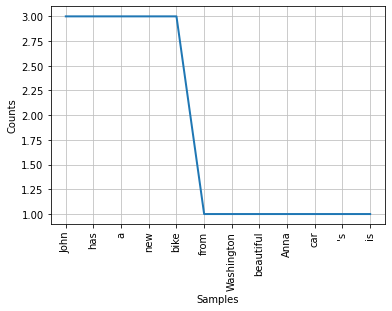

In [20]:
import nltk
import matplotlib.pyplot as plt

words = nltk.tokenize.word_tokenize(texts)
fd = nltk.FreqDist(words)
fd.plot()

**`Synonimy i wordnet`**

 Za pomocą `nltk` i modułu `wordnet` możemy w prosty sposób wygenerować `synonimy / antonimy` lub uzyskać szczegółowe informacje o słowach.

In [25]:
# Basic indormations about the words
from nltk.corpus import wordnet
syns = wordnet.synsets("cat") 
  
print(syns[0].name())

print(syns[0].definition()) 
  
print(syns[0].lemmas()[0].name()) 
  



cat.n.01
feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
cat


In [28]:
# Synonyms and antonyms 
synonyms = []
antonyms = []
for synset in wordnet.synsets("Heavy"):
    for lemma in synset.lemmas():
        synonyms.append(lemma.name())    
        if lemma.antonyms():    
            antonyms.append(lemma.antonyms()[0].name())
print('Synonyms: ' + str(synonyms))
print('Antonyms: ' + str(antonyms))

Synonyms: ['heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'heavy', 'fleshy', 'heavy', 'overweight', 'clayey', 'cloggy', 'heavy', 'heavy', 'lowering', 'sullen', 'threatening', 'heavy', 'heavy', 'heavy', 'dense', 'heavy', 'impenetrable', 'heavy', 'heavy', 'big', 'heavy', 'heavy', 'sonorous', 'intemperate', 'hard', 'heavy', 'grave', 'grievous', 'heavy', 'weighty', 'heavy', 'lumbering', 'ponderous', 'heavy', 'heavy', 'heavy', 'heavy', 'weighed_down', 'heavy', 'labored', 'laboured', 'arduous', 'backbreaking', 'grueling', 'gruelling', 'hard', 'heavy', 'laborious', 'operose', 'punishing', 'toilsome', 'heavy', 'leaden', 'heavy', 'profound', 'sound', 'wakeless', 'big', 'enceinte', 'expectant', 'gravid', 'great', 'large', 'heavy', 'with_child', 'heavy', 'heavily']
Antonyms: ['light', 'light', 'light', 'light', 'light', 'light']


`Zadania`

`1.` Znajdź 3 synonimy i antonimy słowa `great`

In [ ]:
#Your solution here

`2.` Mając dany tekst o Pythonie , wyświetl częstotliwość występowania w słów w danym zdaniu.

txt='''Python – język programowania wysokiego poziomu

ogólnego przeznaczenia,

o rozbudowanym pakiecie bibliotek standardowych'''


`3.` Na podstawie tabeli występowania słów (obiektu `dataframe`) oblicz podstawową statystykę tego wyniku za pomocą funkcji pandas `describe()`.

In [ ]:
# Your Solution here

`4.` Wyznacz wykres częstotliwości słów obecnych w tekście o Pythonie.
   

In [ ]:
# Your solution here

`5.`  Zidentyfikuj części mowy w tekście o Pythonie. Przypisz je do odpowiednich słów.

In [ ]:
# Your solution here